In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data sources

In [2]:
DATA_FOLDER = '/beelife/data/VTCSS14.0.0'
DATA_FILE_KVG = 'VTCSS14.KVGAB29.0/euph_000014_vetcases_table_kvg.csv'
DATA_FILE_AT = 'VTCSS14.VTCST30.0/euph_000014_vetcases_table_vetcaseat.csv'
DATA_FILE_BE = 'VTCSS14.VTCSB31.0/euph_000014_vetcases_table_vetcasebe.csv'
DATA_FILE_VETCASE = 'VTCSS14.VTCSE33.0/euph_000014_vetcases_table_vetcase.csv'
DATA_FILE_AT_BLURRED = 'VTCSS14.VTCSS32.0/vetcaseat22_blurred.csv'
DATA_FILE_REFERENCES = 'VTCSS14.RFRNC70.0/euph_000014_vetcases_table_references.csv'
VOCABULARY_FILE = '/beelife/data/EUPH Code Book.csv'

### Notebook parameters

In [3]:
VERBOSE = True

### Load dataset

In [4]:
vetcases_df = pd.read_csv(os.path.join(DATA_FOLDER, DATA_FILE_VETCASE))

In [5]:
if VERBOSE:
    print(vetcases_df.head())
    print(vetcases_df.describe())
    print(vetcases_df['disease'].value_counts())
    print(vetcases_df['casenumber'].value_counts())
    print(vetcases_df['annotation'].unique())
    print(vetcases_df.isnull().sum())

   id  year  month       casenumber                           disease  \
0   1  2015    1.0  TKH-2014-000443  American foulbrood of honey bees   
1   2  2015    1.0  TKH-2014-000454  American foulbrood of honey bees   
2   3  2015    2.0  TKH-2015-000173  American foulbrood of honey bees   
3   4  2015    3.0  TKH-2015-000335  American foulbrood of honey bees   
4   5  2015    2.0  TKH-2015-000553  American foulbrood of honey bees   

   animalspecies   datestart     dateend country  nuts  districtcode  \
0        1341976  2015-01-07  2015-05-04     AUT  AT12         307.0   
1        1341976  2015-01-12         NaN     AUT  AT21         205.0   
2        1341976  2015-02-16  2015-04-08     AUT  AT12         325.0   
3        1341976  2015-03-06  2015-04-09     AUT  AT12         309.0   
4        1341976  2015-02-12         NaN     AUT  AT21         205.0   

   postcode    unit  value  annotation  sourceid  
0       NaN  number      1         NaN        50  
1       NaN  number      1

### Load vocabulary

In [6]:
vocabulary_df = pd.read_csv(VOCABULARY_FILE)

In [7]:
if VERBOSE:
    print(vocabulary_df.head())
    print(vocabulary_df.describe())
    print(vocabulary_df.value_counts())
    print(vocabulary_df.isnull().sum())

   EUPH code                  Name          English  \
0          1  Robinia pseudoacacia     false locust   
1          2       Castanea sativa   sweet chestnut   
2          3        Brassica napus         rapeseed   
3          4          intermediate     intermediate   
4          5                apiary  apiary;bee yard   

                                          Definition   Parent  
0  The [taxonomic species](https://www.gbif.org/s...       51  
1  The [taxonomic species](https://www.gbif.org/s...  51;8001  
2  The [taxonomic species](https://app.pollinator...       51  
3  <q>being or happening vetween to things, place...      127  
4  Any [location](https://app.pollinatorhub.eu/vo...      126  
         EUPH code
count  4655.000000
mean   2890.770354
std    2357.746296
min       1.000000
25%    1164.500000
50%    2328.000000
75%    3538.500000
max    8042.000000
EUPH code  Name                                     English                            Definition                 

In [8]:
classes = vocabulary_df['Name'].values

### Check dates

In [59]:
vetcases_df['datestart'] = pd.to_datetime(vetcases_df['datestart'])
vetcases_df['dateend'] = pd.to_datetime(vetcases_df['dateend'])
(vetcases_df['dateend'] < vetcases_df['datestart']).sum()

0

### Check classes 

In [9]:
for class_item in classes:
    if 'Varroosis' in class_item:
        print(class_item)

Varroosis of honey bees


In [11]:
# Find mismatches
columns = ['disease']
classes_not_standardized = {}
for col in columns:
    for item_name in vetcases_df[col].unique():
        if item_name not in classes:
            print(f"Disease --{item_name}-- is not in the standard classes.")
            try:
                classes_not_standardized[col].append(item_name)
            except:
                classes_not_standardized[col] = [item_name]

print(classes_not_standardized)

Disease --American foulbrood of honey bees-- is not in the standard classes.
Disease --Varroosis of honey bees in the case of imminent or actual death of at least 30% of the colonies in an apiary-- is not in the standard classes.
Disease --European foulbrood of honey bees-- is not in the standard classes.
{'disease': ['American foulbrood of honey bees', 'Varroosis of honey bees in the case of imminent or actual death of at least 30% of the colonies in an apiary', 'European foulbrood of honey bees']}


In [12]:
import difflib
for col in classes_not_standardized.keys():
    for class_not_standardized in classes_not_standardized[col]:
        print(class_not_standardized)
        possible_matches = difflib.get_close_matches(class_not_standardized, classes)
        if len(possible_matches) == 0:
            for word in class_not_standardized.split(' '):
                possible_matches.append(difflib.get_close_matches(word, classes))
        print(f"{class_not_standardized} possible matches: \n", possible_matches)    

American foulbrood of honey bees
American foulbrood of honey bees possible matches: 
 ['American foulbrood of honey bees (AFB)', 'European foulbrood of honey bees (EFB)', 'Chalkbrood disease of honey bees']
Varroosis of honey bees in the case of imminent or actual death of at least 30% of the colonies in an apiary
Varroosis of honey bees in the case of imminent or actual death of at least 30% of the colonies in an apiary possible matches: 
 [[], [], ['honey', 'Honey', 'honeydew'], ['beeswax', 'beehouse', 'Abies'], ['wind', 'Wine', 'Kina'], ['other', 'Other', 'Vetches'], ['case', 'increase', 'crane'], [], ['Pimento', 'Commitment'], ['hour', 'Coir'], ['katal', 'pascal', 'data'], ['death', 'eats', 'date'], [], ['watt', 'eats', 'date'], ['plastic', 'eats', 'Peas'], [], [], ['other', 'Other', 'Vetches'], ['colony'], ['wind', 'Wine', 'Kina'], ['anus', 'Rand', 'Oman'], ['apiary', 'apiary ID', 'apiary name']]
European foulbrood of honey bees
European foulbrood of honey bees possible matches: 


### Manual standardization

In [17]:
row_index = vetcases_df['disease'] == 'American foulbrood of honey bees'
vetcases_df.loc[row_index, 'disease'] = 'American foulbrood of honey bees (AFB)'

In [18]:
row_index = vetcases_df['disease'] == 'European foulbrood of honey bees'
vetcases_df.loc[row_index, 'disease'] = 'European foulbrood of honey bees (EFB)'

In [28]:
row_index = vetcases_df['disease'] == 'Varroosis of honey bees in the case of imminent or actual death of at least 30% of the colonies in an apiary'
vetcases_df.loc[row_index, 'annotation'] = "in the case of imminent or actual death of at least 30% of the colonies in an apiary"
vetcases_df.loc[row_index, 'disease'] = 'Varroosis of honey bees'

row_index = vetcases_df['disease'] == 'Varroosis of honey bees'
vetcases_df.loc[row_index, 'annotation'].apply(lambda x: x + " new")

463    in the case of imminent or actual death of at ...
493    in the case of imminent or actual death of at ...
Name: annotation, dtype: object

In [29]:
# Verify
print(vetcases_df['disease'].value_counts())
print(vetcases_df['casenumber'].value_counts())
print(vetcases_df['annotation'].unique())

disease
American foulbrood of honey bees (AFB)    560
European foulbrood of honey bees (EFB)     35
Varroosis of honey bees                     2
Name: count, dtype: int64
casenumber
TKH-2014-000443    1
TKH-2018-000075    1
TKH-2018-000065    1
TKH-2018-000064    1
TKH-2018-000061    1
                  ..
TKH-2016-000164    1
TKH-2016-000163    1
TKH-2016-000162    1
TKH-2016-000161    1
TKH-2020-000052    1
Name: count, Length: 460, dtype: int64
[nan
 'in the case of imminent or actual death of at least 30% of the colonies in an apiary']


### Export standardized data

In [33]:
vetcases_df.to_csv(os.path.join(DATA_FOLDER, ".".join(DATA_FILE_VETCASE.split('.')[:-1]) + '_edit.csv'))

### Explore the status of bees in Belgium and Austria

In [41]:
vetcases_df['duration'] = (vetcases_df['dateend'] - vetcases_df['datestart']).dt.days

   id  year  month       casenumber                                 disease  \
0   1  2015    1.0  TKH-2014-000443  American foulbrood of honey bees (AFB)   
1   2  2015    1.0  TKH-2014-000454  American foulbrood of honey bees (AFB)   
2   3  2015    2.0  TKH-2015-000173  American foulbrood of honey bees (AFB)   
3   4  2015    3.0  TKH-2015-000335  American foulbrood of honey bees (AFB)   
4   5  2015    2.0  TKH-2015-000553  American foulbrood of honey bees (AFB)   

   animalspecies  datestart    dateend country  nuts  districtcode  postcode  \
0        1341976 2015-01-07 2015-05-04     AUT  AT12         307.0       NaN   
1        1341976 2015-01-12        NaT     AUT  AT21         205.0       NaN   
2        1341976 2015-02-16 2015-04-08     AUT  AT12         325.0       NaN   
3        1341976 2015-03-06 2015-04-09     AUT  AT12         309.0       NaN   
4        1341976 2015-02-12        NaT     AUT  AT21         205.0       NaN   

     unit  value annotation  sourceid  durat

In [57]:
(vetcases_df['duration'] < 0).sum()

0

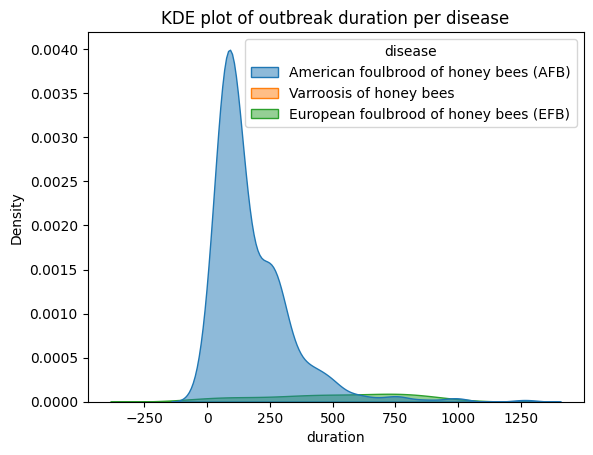

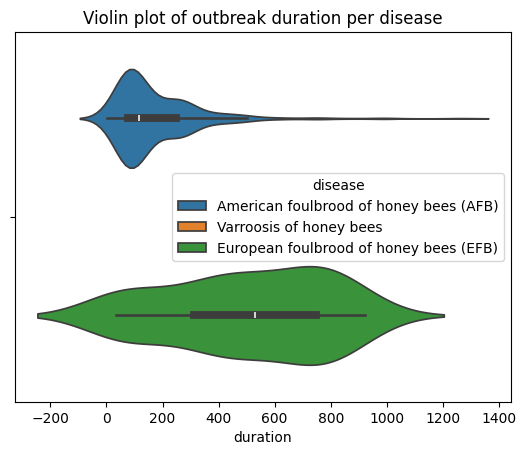

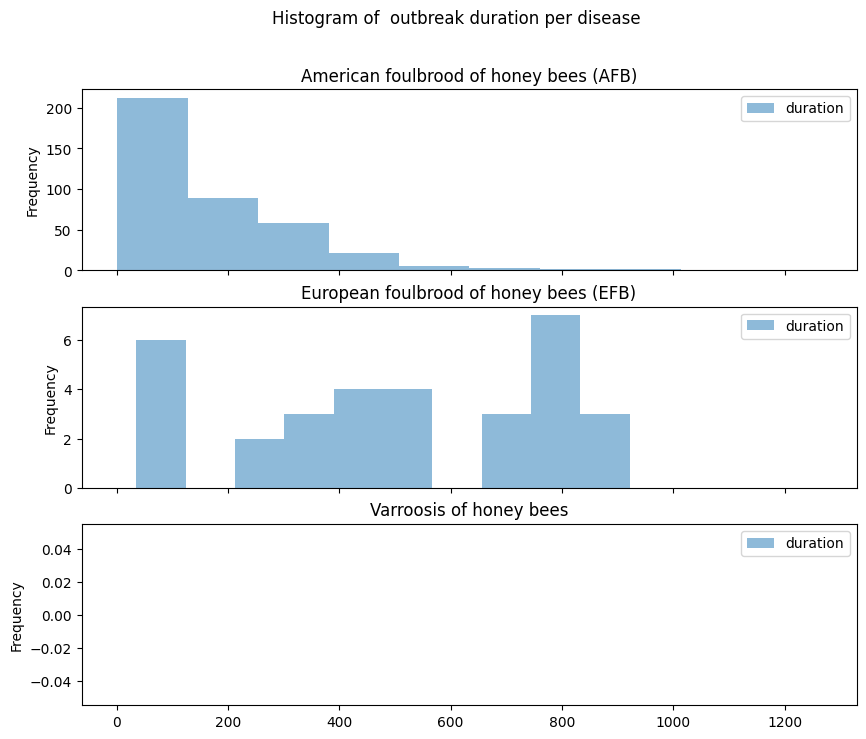

In [70]:
# Outbreak durations
sns.kdeplot(data=vetcases_df, x='duration', hue = 'disease', alpha=0.5, fill=True)
plt.title(f"KDE plot of outbreak duration per disease")
plt.show()

sns.violinplot(data=vetcases_df, x = 'duration', hue = 'disease')
plt.title(f"Violin plot of outbreak duration per disease")
plt.show()

ax = vetcases_df.plot.hist(column='duration', by='disease', alpha=0.5, sharex=True, figsize=(10, 8), title="Histogram of  outbreak duration per disease")
plt.show()

In [99]:
vetcases_df.groupby(['year','disease']).size().reset_index(name='counts')

,year,disease,counts
0,2006,American foulbrood of honey bees (AFB),1
1,2007,American foulbrood of honey bees (AFB),1
2,2008,American foulbrood of honey bees (AFB),1
3,2009,American foulbrood of honey bees (AFB),1
4,2010,American foulbrood of honey bees (AFB),1
5,2011,American foulbrood of honey bees (AFB),1
6,2012,American foulbrood of honey bees (AFB),1
7,2013,American foulbrood of honey bees (AFB),1
8,2014,American foulbrood of honey bees (AFB),1
9,2014,European foulbrood of honey bees (EFB),3


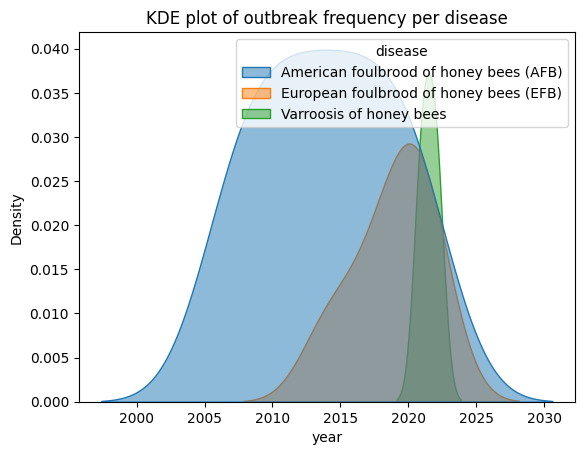

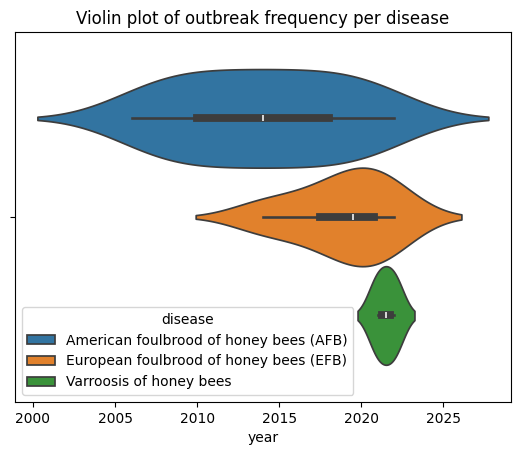

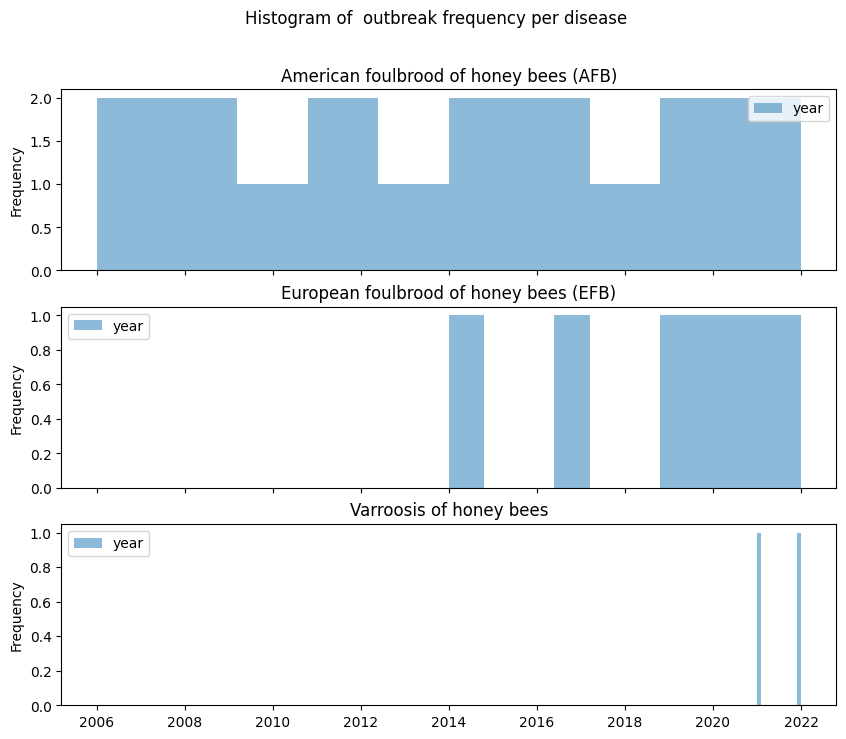

In [100]:
# Outbreak durations / year
sns.kdeplot(data=vetcases_df.groupby(['year','disease']).size().reset_index(name='counts'), x='year', hue = 'disease', alpha=0.5, fill=True)
plt.title(f"KDE plot of outbreak frequency per disease")
plt.show()

sns.violinplot(data=vetcases_df.groupby(['year','disease']).size().reset_index(name='counts'), x = 'year', hue = 'disease')
plt.title(f"Violin plot of outbreak frequency per disease")
plt.show()

ax = vetcases_df.groupby(['year','disease']).size().reset_index(name='counts').plot.hist(column='year', by='disease', alpha=0.5, sharex=True, figsize=(10, 8), title="Histogram of  outbreak frequency per disease")
plt.show()

### Display map

In [ ]:
import folium
import geopandas as gpd
from shapely.geometry import shape
from branca.colormap import linear

colormap = linear.RdBu_06.scale(0, 300)

# To be beautified using: https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html


# Initialize the map (e.g., centered in Europe)
m = folium.Map(location=[50, 10], zoom_start=4)

# Load the shapefile
shapefile_path = "/beelife/data/NUTS_RG_20M_2024_3035.shp" 

gdf = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame by NUTS code
nuts_code = 'AT12'  # Replace with the NUTS code you want to highlight

region_ids = vetcases_df['nuts'].unique()
np.random.shuffle(region_ids)

for i, nuts_code in enumerate(region_ids):
    region = gdf[gdf['NUTS_ID'] == nuts_code].copy()
    '''
    # Get the centroid of the region for map centering 
    centroid = region.geometry.centroid.iloc[0] 
    latitude = centroid.y 
    longitude = centroid.x 
    '''
    if len(region.index) == 0:
        continue
    region["colormapval"] = i*10
    # Add the region to the map (Convert the geometry into GeoJSON and add it as a feature)
    folium.GeoJson( region, style_function=lambda x: { 'fillColor': colormap(x["properties"]["colormapval"]), # Highlight color 
                                                  'color': 'black', # Border color 
                                                  'weight': 2, # Border width 
                                                  'fillOpacity': 0.5 # Fill opacity 
                                                 } ).add_to(m) 


'''
# Get the centroid of the region for map centering 
centroid = region.geometry.centroid.iloc[0] 
latitude = centroid.y 
longitude = centroid.x 
'''

# Display the map in the notebook
m


In [ ]:
# Save the map 
m.save("highlighted_region_map.html") # Save the map to an HTML file